# FALL 2022 AS Advocacy Agenda Survey Result Analysis

### Office of Communications, UCSD Associated Students


- Survey goal/ purpose: Collecting inputs from students what students are looking for Associated Students in UCSD/ help determine AS priorities for the upcoming school year
- Survey period: Week 6 ~ Final Week of Fall 2022
- Survey conductor(s): Data Officer (Jiyeon Song, jis036@ucsd.edu), Office of Communications, UCSD Associated Students
- Survey participants: UCSD undergraduate students
- Total participants: 182
- Survey result link: https://docs.google.com/spreadsheets/d/1wS7-18ffVE9XoubB6v3hbioHSAJGgROoZFsnvsRfO98/edit?usp=sharing

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor


%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [18]:
responses = pd.read_csv('survey_fa22.csv')
responses

,Timestamp,UCSD Email Address (for the giveaway!),What college are you from?,What year are you?,How would you describe yourself? (feel free to add other),What academic division(s) are you in?,Where do you get your AS information from? Please select all that apply.,What area(s) would you like to see Associated Students prioritize FUNDING in the upcoming year?,What area(s) would you like to see Associated Students prioritize ADVOCACY in the upcoming year?,Do you feel that the current campus resources are able to accommodate your needs and do you think those are accessible?,...,"To verify and increase reliability on collecting the data, please click the answer ""AS"".",What is/are the best way(s) for your student representatives and Associated Students to reach out to you or which way you prefer to contact them?,What type of events/activities would you like to see from AS or colleges' councils?,Would you be more interested in in-person or virtual events?,What is/are the area(s) of campus life that you liked and enjoyed the most in the current academic year?,What is/are the area(s) of campus life that you're excited and looking forward about in the upcoming year?,What is/are the area(s) of campus life that you worried and concerned the most in the current academic year?,What is/are the area(s) of campus life that you're worried and concerned about in the upcoming year?,What is/are the area(s) of campus life that you'd like to LEARN more about in the upcoming year?,Additional comments/opinions that you want to share with Associated Students?
0,11/2/2022 10:38:17,cydeng@ucsd.edu,Sixth,Third year/First year transfer Student,NaN,Data Science,"AS Newsletter (Email), Campus/College Newslett...","Spirit & Athletics (building school spirit), E...","Spirit & Athletics (building school spirit), E...",Yes,...,AS,"Email, Appointment meeting (zoom/in-person)",NaN,In-person,NaN,NaN,NaN,NaN,NaN,NaN
1,11/2/2022 12:03:25,veliu@ucsd.edu,Seventh,Second year Student,"In-state student, First Gen student",Social Sciences,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), Sp...",Environmental Justice Affairs (intersectional ...,Yes,...,AS,"Email, Virtual Office Hours, Social Networking...",NaN,In-person,NaN,NaN,NaN,NaN,NaN,NaN
2,11/2/2022 12:35:57,mcl005@ucsd.edu,John Muir,Third year/First year transfer Student,"Out-of-state student, International student",Social Sciences,"AS Newsletter (Email), Instagram Account (@ASU...","Academic Affairs (academic accommodations), He...","Academic Affairs (academic accommodations), He...",No,...,AS,"Email, Social Networkings (e.g. @asucsd Instag...",NaN,Both (Either one),NaN,NaN,NaN,NaN,NaN,NaN
3,11/3/2022 0:20:57,hmyers@ucsd.edu,Thurgood Marshall,Fourth year/Second year transfer Student,"In-state student, First Gen student",Arts and Humanities,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), En...","Spirit & Athletics (building school spirit), C...","Yes my needs are accommodated, no I don't thin...",...,AS,"Email, Appointment meeting (zoom/in-person)",NaN,Both (Either one),NaN,NaN,NaN,NaN,NaN,NaN
4,11/7/2022 19:11:16,Jjquiroz@ucsd.edu,Earl Warren,Fourth year/Second year transfer Student,"In-state student, First Gen student",Biological Sciences,AS Newsletter (Email),"Concerts & Events (Sun God Festival, special s...","Food & Housing Resources (basic needs, financi...",Yes,...,AS,Email,More concerts,Both (Either one),Events to meet people,Sungod,Transportation,Parking,Financial aid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,12/1/2022 7:29:54,khusarlazarova@ucsd.edu,Sixth,Fourth year/Second year transfer Student,"Transfer student, First Gen student",Arts and Humanities,AS Newsletter (Email),I would like to see the association take an in...,I would like to see the association take an in...,No,...,AS,Email,strike for more open classes,Both (Either one),NaN,NaN,The upper floor

In [21]:
filt_resp = responses.drop(columns = ['Timestamp', 'UCSD Email Address (for the giveaway!)'])
df = filt_resp[filt_resp['To verify and increase reliability on collecting the data, please click the answer "AS".'] == 'AS'].drop(columns = ['To verify and increase reliability on collecting the data, please click the answer "AS".']).rename(columns = {
    'What college are you from?': 'college', 
    'What year are you?': 'academic year', 
    'How would you describe yourself? (feel free to add other)': 'identity', 
    'What academic division(s) are you in?': 'academic division(s)', 
    'Where do you get your AS information from? Please select all that apply. ': 'getting AS information', 
    'What area(s) would you like to see Associated Students prioritize FUNDING in the upcoming year? ': 'funding', 
    'What area(s) would you like to see Associated Students prioritize ADVOCACY in the upcoming year? ': 'advocacy', 
    'Do you feel that the current campus resources are able to accommodate your needs and do you think those are accessible?': 'able to accommodate needs', 
    'If you answer "Yes" on the above question, which resource do you find most helpful and why?': 'yes-helpful', 
    'If you answer "No" on the above question, which resource do you feel needs more improvement to better accommodate students?': 'no-improvement', 
    'Are you interested in Student Lead Committee (check where AS Finance goes, give feedback how AS is doing, etc.)?': 'interested in student lead committee', 
    'Do you have any suggestion that AS can practice to improve their transparency?': 'improve transparency', 
    'I know what Associated Students is and am familiar with what they do.': 'know what AS is/does', 
    'If you answered the scale of 1-2 above, please describe in your own words what Associated Students is and what they do.': 'yes-know what AS is/does', 
    'There are student advocates at UC San Diego that understand my needs and concerns.': 'student advocates know what the needs and concerns', 
    'There are student advocates at UC San Diego that are actively working to address my needs and concerns.': 'student advocates work for the needs and concerns', 
    'Are you aware of which student representative advocates on YOUR needs and interests?': 'know who are student representative', 
    'Share your opinions and thoughts about Associated Students.': 'opinions/thoughts about AS', 
    'What is/are the best way(s) for your student representatives and Associated Students to reach out to you or which way you prefer to contact them?': 'best way to contact students', 
    "What type of events/activities would you like to see from AS or colleges' councils?": 'preferable events/activities', 
    'Would you be more interested in in-person or virtual events?': 'in-person or virtual', 
    'What is/are the area(s) of campus life that you liked and enjoyed the most in the current academic year?': 'past/present-liked/enjoyed',
    "What is/are the area(s) of campus life that you're excited and looking forward about in the upcoming year?": 'future-looking forward', 
    "What is/are the area(s) of campus life that you worried and concerned the most in the current academic year?": 'past/present-worried/concerned', 
    "What is/are the area(s) of campus life that you're worried and concerned about in the upcoming year?": 'future-worried/concerned', 
    "What is/are the area(s) of campus life that you'd like to LEARN more about in the upcoming year?": 'future-preferable resources', 
    'Additional comments/opinions that you want to share with Associated Students?': 'additional comments/opinions'})


## Students' Demographics:

<AxesSubplot:xlabel='college', ylabel='count'>

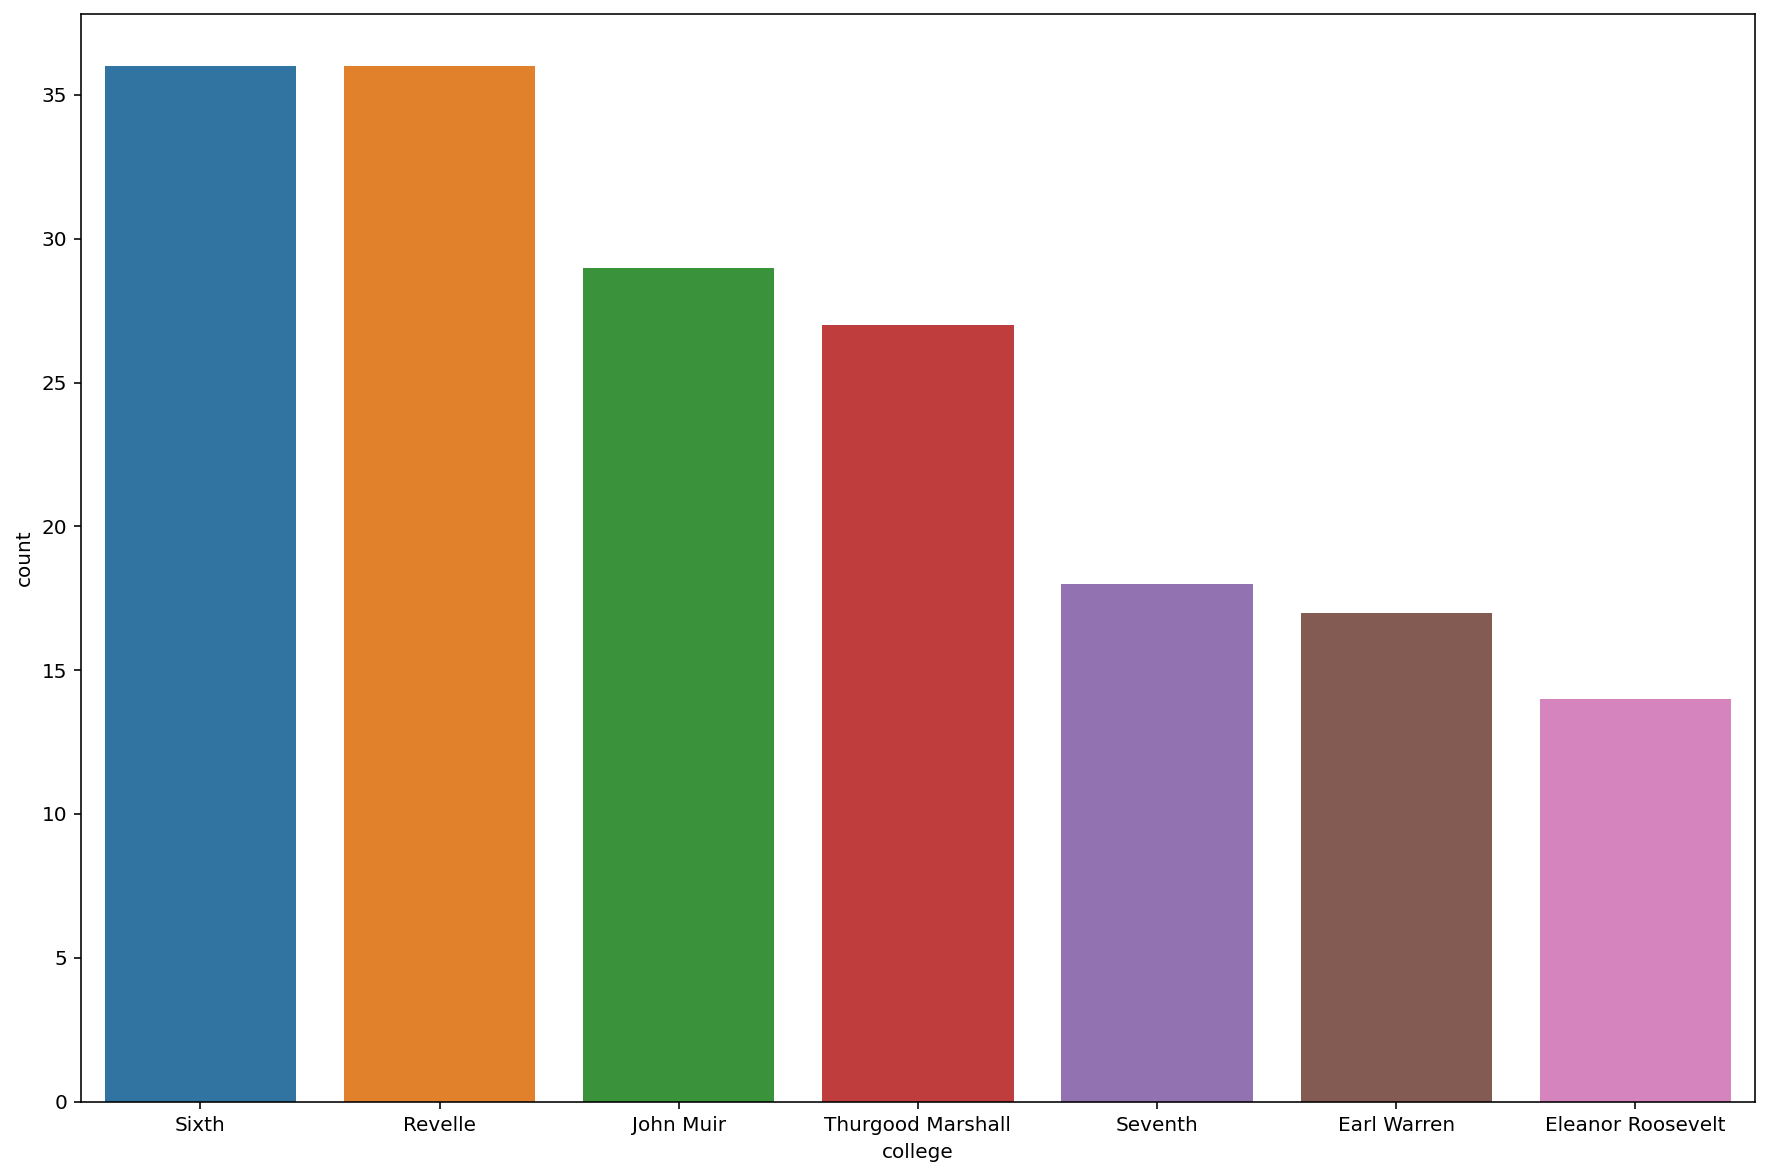

In [94]:
# college
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = df["college"], order = df["college"].value_counts().index)

<AxesSubplot:xlabel='academic year', ylabel='count'>

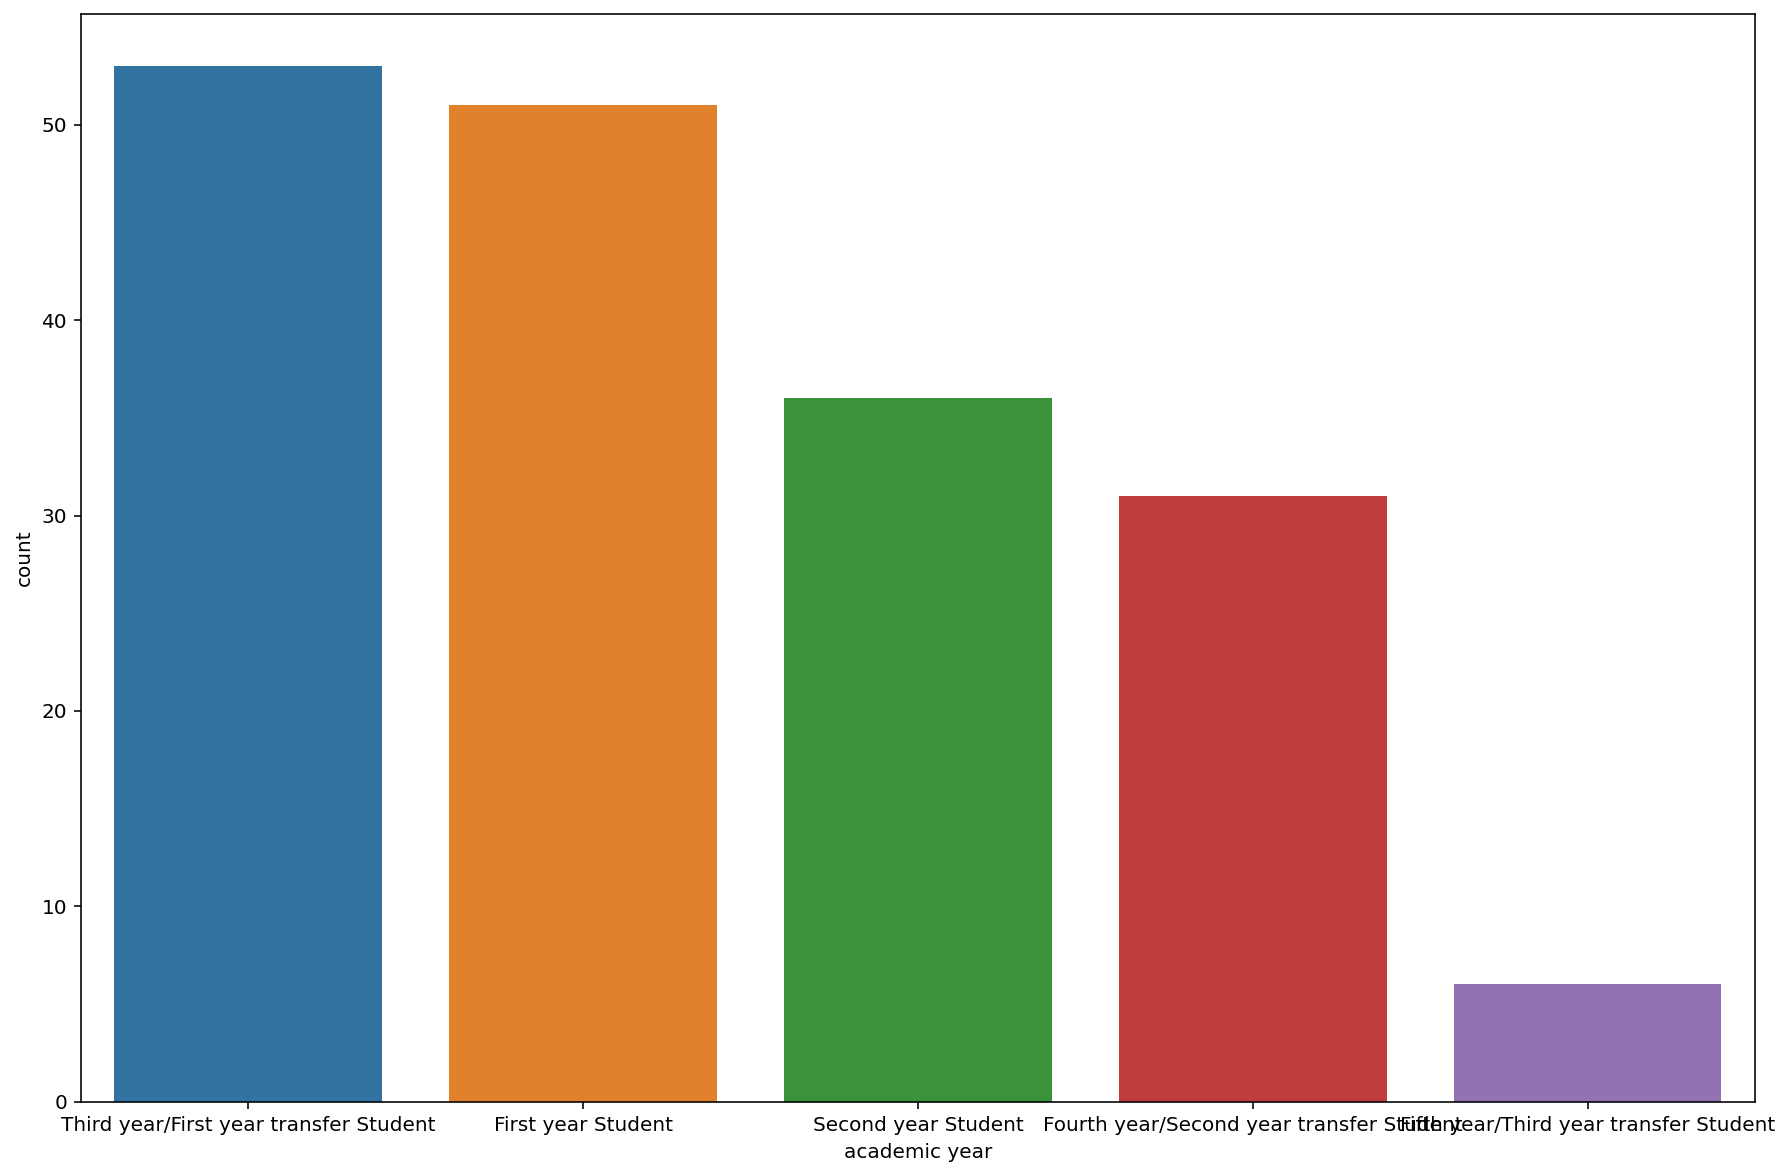

In [92]:
# year
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = df["academic year"], order = df["academic year"].value_counts().index)

<BarContainer object of 8 artists>

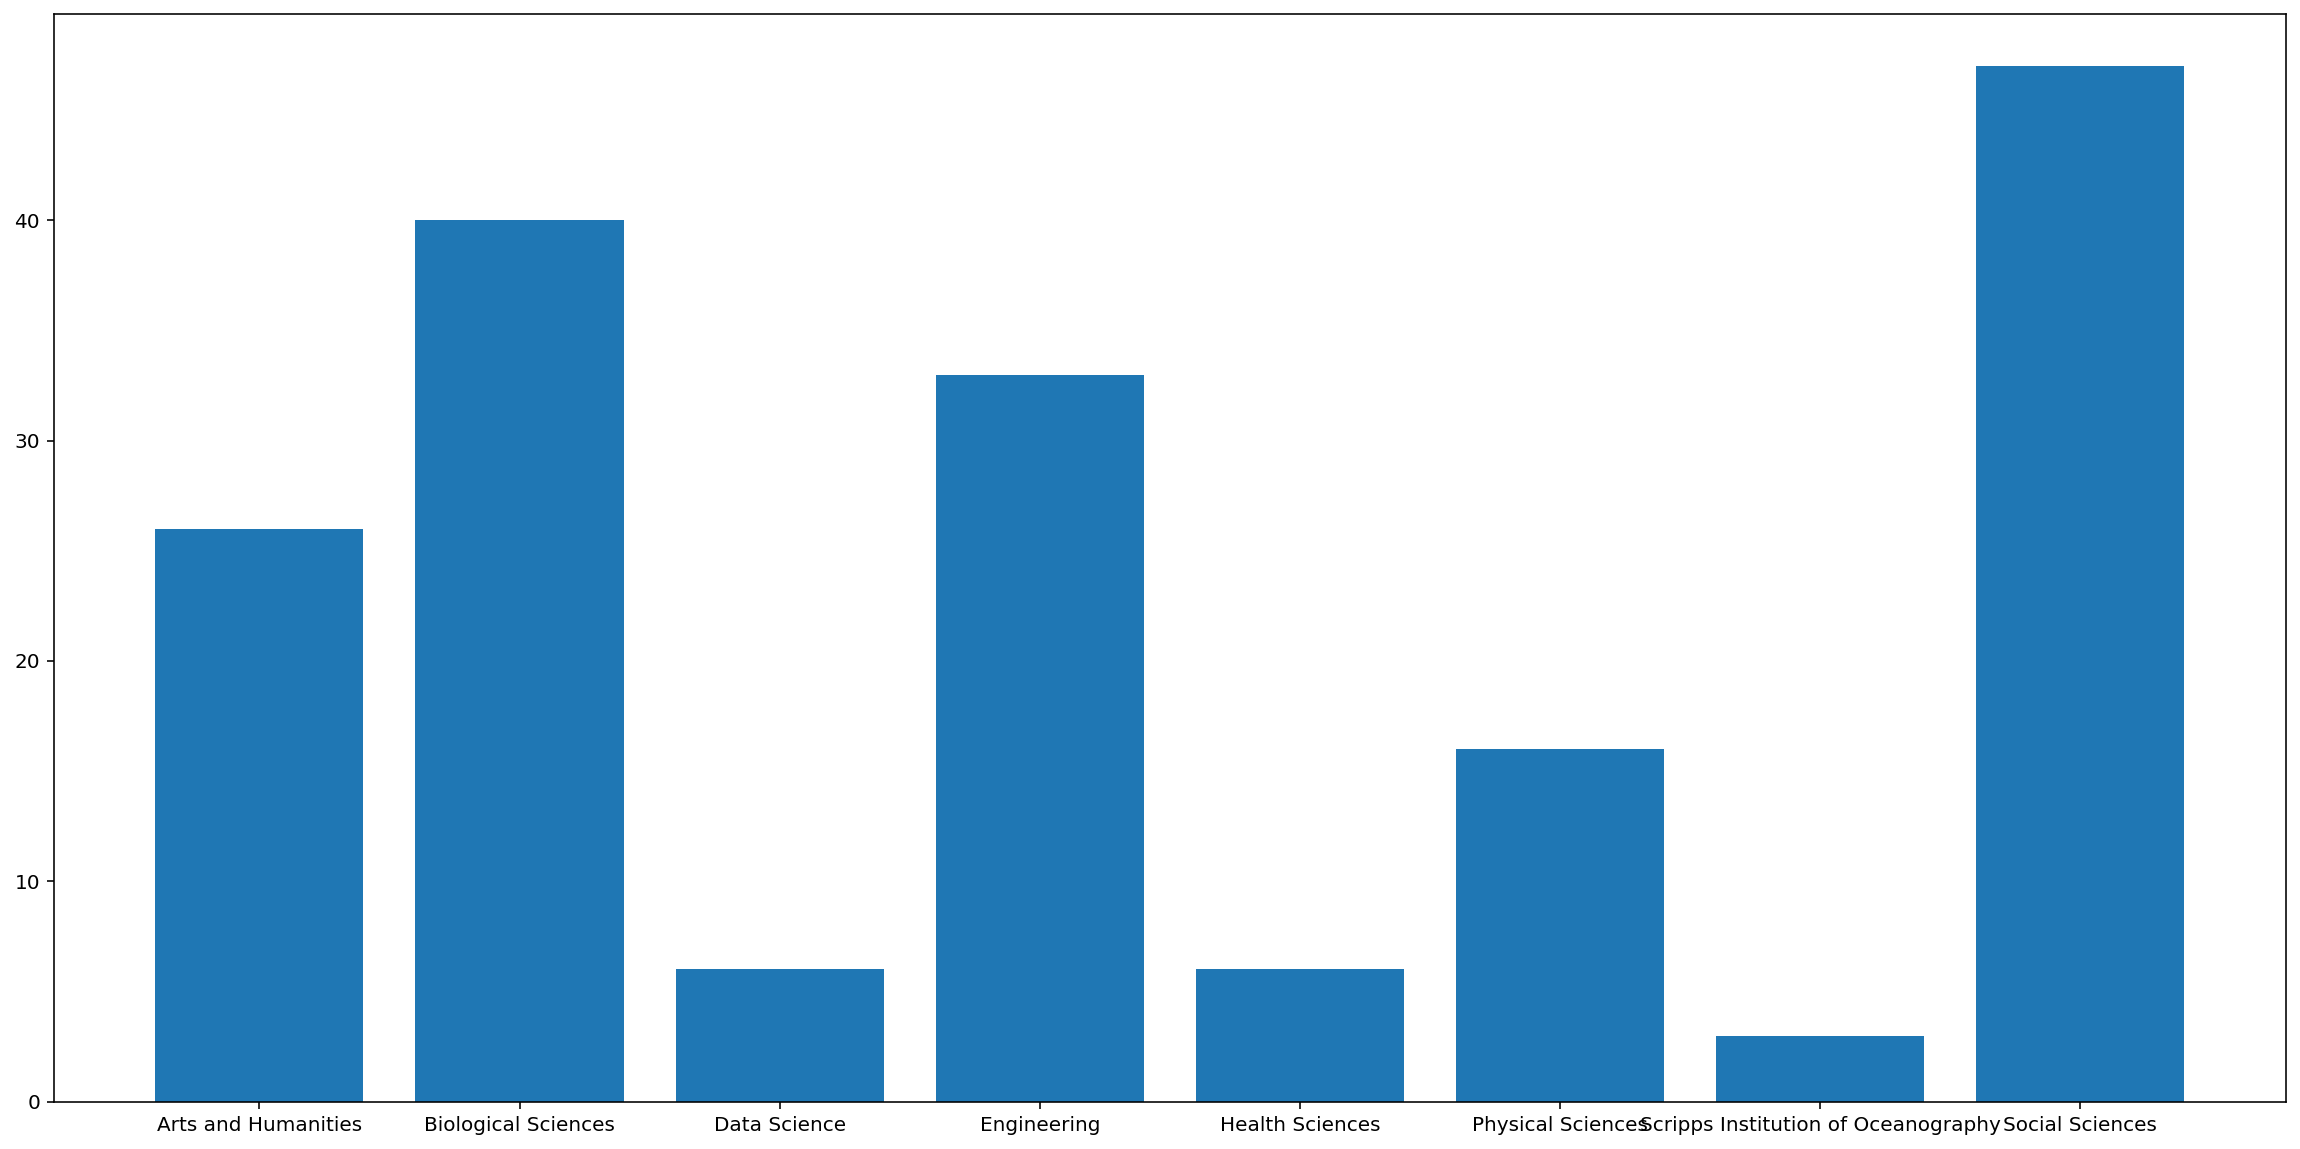

In [88]:
# academic department (allow multiple choices) - alphabetical order
div_dict = {'Arts and Humanities': 0, 'Biological Sciences': 0, 'Data Science': 0, 'Engineering': 0, 'Health Sciences': 0, 'Physical Sciences': 0, 'Scripps Institution of Oceanography': 0, 'Social Sciences': 0}
for i in df["academic division(s)"]:
    if 'Arts and Humanities' in i:
        div_dict['Arts and Humanities'] += 1
    elif 'Biological Sciences' in i:
        div_dict['Biological Sciences'] += 1
    elif 'Data Science' in i:
        div_dict['Data Science'] += 1
    elif 'Engineering' in i:
        div_dict['Engineering'] += 1
    elif 'Health Sciences' in i:
        div_dict['Health Sciences'] += 1
    elif 'Physical Sciences' in i:
        div_dict['Physical Sciences'] += 1
    elif 'Scripps Institution of Oceanography' in i:
        div_dict['Scripps Institution of Oceanography'] += 1
    elif 'Social Sciences' in i:
        div_dict['Social Sciences'] += 1

fig, ax = plt.subplots(figsize=(20, 10))
div, num = zip(*div_dict.items())
plt.bar(div, num)

## Common ways to get AS Information 
(multiple choices allowed)
1. Instagram Account - 78.6% 📱💪
2. Campus/College Newsletter - 42.3% 📰
3. AS Newsletter (Email) - 39.6% ℹ️
4. Word of mouth(including AS Senators & College Councils)- 26.6% 🗣️
5. In-person tabling/events - 20.9% 🔊
6. Other social medias - 5.4%
7. Price Center information board - 0.5%


## What area(s) would you like to see Associated Students prioritize FUNDING in the upcoming year?

1. Food & Housing Resources (basic needs, financial assistance, etc.)
2. Concerts & Events (Sun God Festival, Triton Dine, special social events, etc.)
3. Transportation & Transformation (campus planning, public transportation, parking, etc.)
4. Health & Well-Being (holistic health/mental health resource accessibility)
5. Student Orgs (student organization support/funding)
6. Academic Affairs (academic accommodations)
7. Equity, Diversity, Inclusion & Social Justice
8. Enterprises & Services (AS Safe Rides, Triton Outfitters, KSDT, Triton TV)
9. Spirit & Athletics (building school spirit)
10. Environmental Justice Affairs (intersectional environmental advocacy)
11. College Affairs (college community building, leadership development)
12. Student Advocacy (academic integrity / student conduct violation counsel)
13. Civic Engagement & Local Affairs (Local government advocacy work)

## FUNDING Preference Comparison from Winter 2022 to Fall 2022

| WI22      | SP22 | FA22 |
| ----------- | ----------- | ----------- |
| 1. Food & Housing Resources (basic needs, financial assistance)| 1. Food & Housing Resources (basic needs, financial assistance)   | 1. Food & Housing Resources (basic needs, financial assistance, etc.)       |
| 2. Concerts & Events (Sun God festival, other social events)| 2. Concerts & Events (Sun God festival, other social events)    | 2. Concerts & Events (Sun God Festival, special social events, etc.)        |
| 3. Transportation & Transformation (public transportation, parking) | 3. Transportation & Transformation (public transportation, parking)   | 3. Transportation & Transformation (campus planning, public transportation, parking, etc.)     |
| 4. Health & Well-Being (physical/ mental health resource accessibility)   | 4. Student Organizations (student organization support/ funding) | 4. Health & Well-Being (holistic health/mental health resource accessibility)        |
| 5. Student Organizations (student organization support/ funding)  | 5. Health & Well-Being (physical/ mental health resource accessibility)  | 5. Student Orgs (student organization support/funding)        |

#### &rarr; TOP Three preferences are firm selections(selected more than 50%) from students📊

## What area(s) would you like to see Associated Students prioritize ADVOCACY in the upcoming year?

1. Food & Housing Resources (basic needs, financial assistance)
2. Health & Well-Being (holistic health/mental health resource accessibility)
3. Equity, Diversity, Inclusion & Social Justice
4. Transportation & Transformation (campus planning, public transportation, parking)
5. Environmental Justice Affairs (intersectional environmental advocacy)
6. Academic Affairs (academic accommodations)
7. Student Orgs (student organization support/funding)
8. Fostering Community (campus-wide event planning)
9. College Affairs (college community building, leadership development)
10. Enterprises & Services (AS Safe Rides, Triton Outfitters, KSDT, Triton TV)
11. Civic Engagement & Local Affairs (Local goverment advocacy work)
12. Spirit & Athletics (building school spirit)
13. Student Advocacy (academic integrity/student conduct violation counsel)

Other comments: Side walks to Rita Atkinson, lack of classes (including long waiting lists)

## ADVOCACY Preference Comparison from Winter 2022 to Fall 2022

| WI22      | SP22 | FA22 |
| ----------- | ----------- | ----------- |
| 1. Food & Housing Resources (basic needs, financial assistance)| 1. Food & Housing Resources (basic needs, financial assistance)   | 1. Food & Housing Resources (basic needs, financial assistance, etc.)       |
| 2. Health & Well-Being (physical/ mental health resource accessibility) | 2. Health & Well-Being (physical/ mental health resource accessibility)    | 2. Health & Well-Being (holistic health/mental health resource accessibility)        |
| 3. Equity, Diversity, Inclusion & Social Justice | 3. Equity, Diversity, Inclusion & Social Justice   | 3. Equity, Diversity, Inclusion & Social Justice     |
| 4. Transportation & Transformation (public transportation, parking)   | 4. Transportation & Transformation (public transportation, parking)  | 4. Transportation & Transformation (campus planning, public transportation, parking)        |
| 5. Environmental Justice Affairs (intersectional environmental advocacy)  | 5. Environmental Justice Affairs (intersectional environmental advocacy)  | 5. Environmental Justice Affairs (intersectional environmental advocacy)        |

#### &rarr; Same advocacy preferences all quarters🤝

## Feeling about the current campus resources (accommodate the needs & accessibility)
* YES - 63.2% ✅
    - Academic Resources (Library, Virtual Advising Center, OASIS, SI Session, Tutorings, Teaching Learning Community)
    - Community Resources (student organizations funding, LGBTQ and Women's center, SPACE, free giveaways)
    - Health & Well-Being (CAPS, on-campus clinic, Food Pantry, Basic Needs Hub, Food co-op)
    - Housing & Dining (RA & Reslife, Triton2Go)
    - Transportation (public transportation, AS Safe Ride, Shuttles, SPIN)

 
* NO - 30.8% ⛔
    - Parking (No space, Expensive parking permit)
    - bad WiFi
    - long waiting for CAPS; need easier accessibility/environment for CAPS
    - OSD office has not been very helpful
    - not sure what resources on campus, hard to find
    - need more TAs
    - Transportation (public transportation is not frequently coming, micromobility)
    - need to increase minimum wage of student workers
    - lack of vegetarian's on-campus dining option
    - Food pantry's line is long all time
    - need more resting lounges for commuters
    - need more shuttle bus stops/routes
    
* other - 6%
    - not sure
    - not using

## Interested in Student Lead Committee 🏫
* YES - 61%
* NO - 39%

## Any suggestion that AS can practice to improve their transparency

- share information on Instagram story/post & more communications (e.g. reminder post for Senate meeting on Wed, etc.)
- make an easy accessibility on the website/social network that shows where funding goes
- "Love what AS President is doing with regular reports so we know what’s going on at meetings and such."
- release an annual budget of how and where money is spent
- release annual reports of funding usage, event outcomes, etc. & explain
- release meeting notes/minutes
- more feedback surveys
- "Post all decisions and campus changes on all social media platforms. Do not hide anything from the student body as “AS” is for the students and by the students. By just showing us where the funding is going for instance, it helps students understand where their tuition and excess cost is going towards."

## About AS
- check this link to see how students define Associated Students, who they are, and what they do:
https://docs.google.com/spreadsheets/d/1wS7-18ffVE9XoubB6v3hbioHSAJGgROoZFsnvsRfO98/edit#gid=1922335595&range=P:P
- Share opinions and thoughts about Associated Students: 
https://docs.google.com/spreadsheets/d/1wS7-18ffVE9XoubB6v3hbioHSAJGgROoZFsnvsRfO98/edit#gid=1922335595&range=T:T



## Best/prefered way(s) for the student representatives and Associated Students to reach out to students
1. Email (87.9%) 📨
2. Social Networkings (65.4%) 📱
3. Appointment Meeting (virtual/in-person) (19.2%) 🗣️
4. Virtual Office Hours (17.6%)
5. In-person Office Hours (14.8%)

## Type of events/activities that students like to see from AS or College's Councils
- Concerts & Festivals (bigger Sungod, Bear Garden,)
- Social events (social mixers - make more chances to meet new people, networking events, sports spirit events, movie nights, fund-raising gala, formal)
- "Events that seek to foster community through food and culture (diverse communities & exploring San Diego)"
- Resource events (share resources on campus)
- Health & Well-Being events (self-care, distress activities, Triton Dines)
- More giveaways

&rarr; 62.6% of students prefer in-person events


### Campus life that students liked/enjoyed (past & current) 🥳
- Social events (Meeting new people, social life)
- Free food/Giveaways
- School events (Bear Gardens, Tablings on Library Walk, Cultural events at Muir, Homecoming, Movie Night)
- Concerts (NIKI Concert, Sungod)
- Student Orgs
- Study on-campus

### Campus life that students are excited/looking forward to see (future) 🤩
- Sungod (45% of students mentioned)
- Social/Sport events (need more various types of events)
- Bear Garden
- Giveaways
- New housing buildings / Eighth college
- Better access on school facilities (especially new buildings)
- Easy access on school resources (resource centers, departments)
- Higher minimum wage for student employee

### Campus life that students were worried/concerned (past & current) 😔
- Social life
- Academics
- Time management
- Mental/Physical health
- Commuting (Transportation & Parking)
- Food insecurity
- TA strikes
- Construction

### Campus life that students are worried/concerned (future) 😮
- Mental/Physical health
- Food insecurity
- Housing insecurity
- Social life
- Graduating on time
- Acadmics (harder classes, grades, deciding a major)
- Housing insecurity
- Sungod


## Additional comments/opinions to Associated Students
https://docs.google.com/spreadsheets/d/1wS7-18ffVE9XoubB6v3hbioHSAJGgROoZFsnvsRfO98/edit#gid=1922335595&range=AD:AD

#### If you have any questions or need clarifications, please contact Data Officer, Jiyeon Song, via jis036@ucsd.edu.